<a href="https://colab.research.google.com/github/Lucas-F-Analysis/Determine-the-reason-for-the-increase-in-blood-pressure/blob/main/Determine_the_reason_for_the_increase_in_blood_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determine the reason for the increase in blood pressure

An independent physician requested my services as a data analyst to determine the reason for the increase in blood pressure in their patients.

For this purpose, he provided me with his dataset

Objective: With this dataset containing the variables Height, Weight, Gender, Age and BP_max, we want to determine the reason why blood pressure increases in the individuals in the dataset. Techniques such as feature engineering, data visualization, and data correlation are used. To find an explanation and solution for blood pressure

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Edad = Age

Talla = Height

Peso = Weight

In [123]:
df = pd.read_csv('/content/drive/MyDrive/DataSet_Edad-Talla-Peso-TA.csv', sep=';')

In [124]:
df.rename(columns={'Altura': 'Height'}, inplace=True)
df.rename(columns={'Peso': 'Weight'}, inplace=True)
df.rename(columns={'Sexo': 'Gender'}, inplace=True)
df.rename(columns={'Edad': 'Age'}, inplace=True)
df.rename(columns={'PA_max': 'BP_max'}, inplace=True)

In [125]:
df

,Height,Weight,Gender,Age,BP_max
0,"1,47",53000,M,33,"12,3"
1,172,90,F,28,"13,3"
2,"1,6",118,M,77,"24,9"
3,"1,76",97,M,52,"18,3"
4,"1,81",118,F,73,"25,8"
...,...,...,...,...,...
4995,"1,85",105,M,74,"13,6"
4996,"1,78",66,F,31,"9,9"
4997,"1,81",168,F,57,"15,5"
4998,"2,04",99,M,44,"11,8"


In [126]:
# Convert string variables Height and BP_max to float variables
# And turn commas into full stops
df['Height'] = df['Height'].str.replace(',', '.').astype(float)
df['BP_max'] = df['BP_max'].str.replace(',', '.').astype(float)

In [127]:
# Replace 'M' por 0 y 'F' por 1 in the column 'Gender'
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

<ipython-input-127-d4fd2df578eb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})


In [128]:
df.describe()

,Height,Weight,Gender,Age,BP_max
count,4901.000000,5000.00000,4910.000000,5000.000000,5000.000000
mean,8.013291,1102.30400,0.513238,47.875000,16.422520
std,32.148415,8753.19627,0.499876,17.300833,13.776803
min,1.450000,0.00000,0.000000,18.000000,8.400000
25%,1.600000,64.00000,0.000000,33.000000,12.500000
50%,1.700000,80.00000,1.000000,48.000000,14.400000
75%,1.820000,104.00000,1.000000,63.000000,16.900000
max,226.000000,123000.00000,1.000000,77.000000,193.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  4901 non-null   float64
 1   Weight  5000 non-null   int64  
 2   Gender  4910 non-null   float64
 3   Age     5000 non-null   int64  
 4   BP_max  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 195.4 KB


In [130]:
null_values_by_column = df.isnull().sum()

# Show the number of null values per column, fill with mean or mode if the sample is small
print(null_values_by_column)

Height    99
Weight     0
Gender    90
Age        0
BP_max     0
dtype: int64


In [131]:
# Removing null values from the dataset
df = df.dropna()

null_values_by_column = df.isnull().sum()

# Show the number of null values per column, fill with mean or mode if the sample is small
print(null_values_by_column)

Height    0
Weight    0
Gender    0
Age       0
BP_max    0
dtype: int64


In [132]:
num_duplicates = df.duplicated().sum()
print(f"There are {num_duplicates} rows duplicates.")

There are 1 rows duplicates.


In [133]:
# Removing duplicates from the dataset
df_no_duplicates = df.drop_duplicates()

In [134]:
num_duplicates = df_no_duplicates.duplicated().sum()
print(f"There are {num_duplicates} rows duplicates.")

There are 0 rows duplicates.


In [135]:
print(df_no_duplicates.dtypes)

Height    float64
Weight      int64
Gender    float64
Age         int64
BP_max    float64
dtype: object


In [136]:
# !pip install ydata-profiling # install the package using pip
# from ydata_profiling import ProfileReport # import the module from the installed package

# # Generate the dataset profile
# profile = ProfileReport(df, title='Dataset Report')

# # Show the report
# profile.to_notebook_iframe()

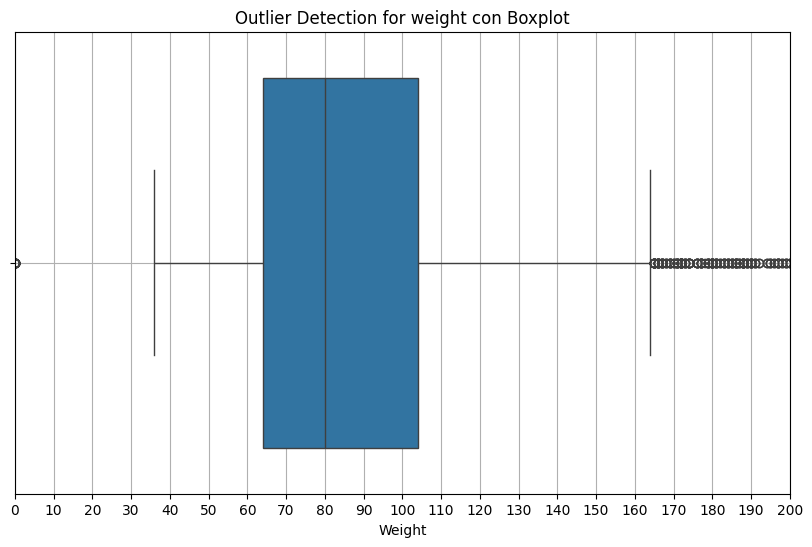

In [137]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Weight'])

# Show the chart
plt.title('Outlier Detection for weight con Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

Inside the ‘box’ we have the central 50% of the data. The lower boundary of the box corresponds to the first quartile, 25% of the data, and the upper boundary corresponds to the third quartile, 75% of the data.

The central 50% of the weights are between approximately 63 kg and 104 kg.
The median appears to be at 80 kg, indicating that the central weight of most people is at this value.

The ‘whiskers’ extend to the smallest and largest values, ranging from approximately 36 kg to 164 kg, with anything outside this range being considered ‘non-outliers’ or ‘outliers’.

Several points above 164 kg are observed here, indicating that there are individuals with weights considerably higher than the majority, which can be considered as outliers.

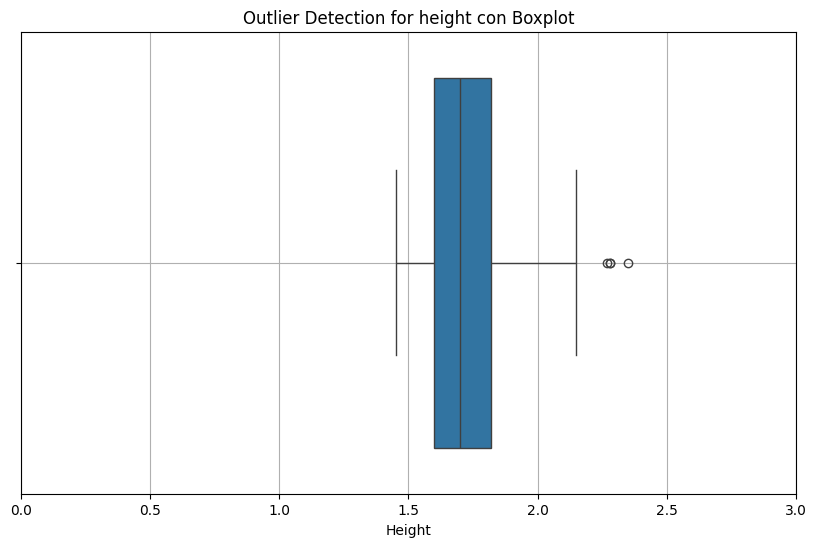

In [138]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Height'])

# Show the chart
plt.title('Outlier Detection for height con Boxplot')
plt.xlim(0, 3)
plt.grid(True)
plt.show()

Within the 'box', we have the central 50% of the data.. The lower limit of the box corresponds to the first quartile, el 25% de los datos, and the upper limit corresponds to the third quartile, el 75% de los datos.

The central 50% of the heights are between approximately 1.6 m and 1.8 m. The median seems to be at 1.7 m, indicating that the central height of most people is at this value. The median seems to be at 1.7 m, indicating that the central height of most people is at this value.

The 'whiskers' extend to the smallest and largest values, van aproximadamente desde 1.4 m hasta 2.2 m, anything outside this range is considered 'outliers'..

Few points higher than 2.2 m are observed here, indicating that there are few people with heights considerably higher than the majority, which can be considered as outliers.

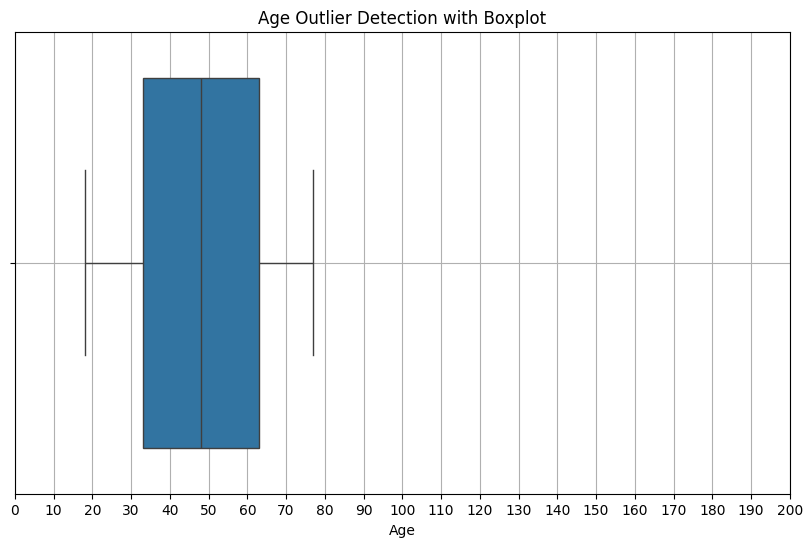

In [139]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])

# Show the chart
plt.title('Age Outlier Detection with Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

The graph is symmetrical

Inside the ‘box’ we have the central 50% of the data. The lower boundary of the box corresponds to the first quartile, 25% of the data, and the upper boundary corresponds to the third quartile, 75% of the data.

The central 50% of the ages are between approximately 32 years and 62 years. The median appears to be at 48 years, indicating that the central height of most people is at this value.

The ‘whiskers’ extend to the smallest and largest values, ranging from approximately 18 years to 78 years, and anything outside this range are considered ‘non-outliers’ or ‘outliers’.

No points outside the ‘whiskers’ range are observed here, indicating that there are no persons considerably older than the majority.

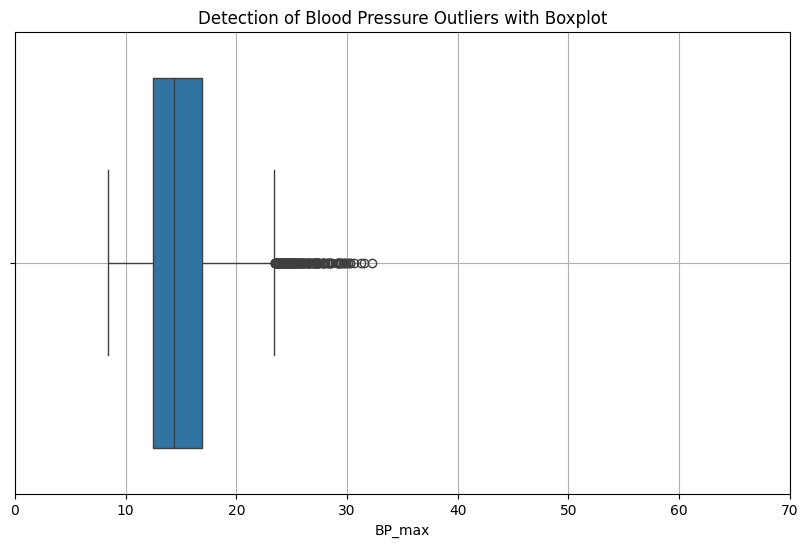

In [140]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['BP_max'])

# Show the chart
plt.title('Detection of Blood Pressure Outliers with Boxplot')
plt.xlim(0, 70)
plt.grid(True)
plt.show()

Inside the ‘box’ we have the central 50% of the data. The lower boundary of the box corresponds to the first quartile, 25% of the data, and the upper boundary corresponds to the third quartile, 75% of the data.

The central 50% of the BPs are between approximately 11.5 mmHg and 16 mmHg. The median appears to be at 14 mmHg, indicating that most people's BP is at this value.

The ‘whiskers’ extend to the smallest and largest values, ranging from approximately 8 mmHg to 24 mmHg; anything outside this range is considered ‘non-outliers’ or ‘outliers’.

Several points above 24 mmHg are observed here, indicating that there are many people with BPs considerably higher than most, which can be considered outliers.

In [141]:
df_new = df_no_duplicates.copy()

In [142]:
# Removing unrealistically heavy weights
mask = df_new['Weight'] > 400

# Remove rows where the condition is true
df_new.drop(index=df_new[mask].index, inplace=True)

In [143]:
# Removing unrealistically light weights
mask = df_new['Weight'] < 20

# Remove rows where the condition is true
df_new.drop(index=df_new[mask].index, inplace=True)

In [144]:
# # OJO ACA, hay una gran reduccion de filas

# # Eliminacion de presiones arteriales ilogicas
# mask = df_nuevo['PA_max'] < 40

# # Eliminar las filas donde la condición es verdadera
# df_nuevo.drop(index=df_nuevo[mask].index, inplace=True)

In [145]:
# Define a function to convert heights to centimeters
def convert_to_metres(height):
    # If the height value is greater than 100, it is assumed to be in cm and converted to meters
    if height > 100:
        return height / 100
    else:
        return height

# Apply the function to the height column
df_new['Height'] = df_new['Height'].apply(convert_to_metres)

# Show the first rows of the DataFrame to verify the conversion
print(df_new.head())

   Height  Weight  Gender  Age  BP_max
1    1.72      90     1.0   28    13.3
2    1.60     118     0.0   77    24.9
3    1.76      97     0.0   52    18.3
4    1.81     118     1.0   73    25.8
5    1.71      69     1.0   18     9.8


In [146]:
# Define a function to convert excessively high PA to normal values
def convert_pressures(pressure):
    # If the height value is greater than 22, it is assumed to be illogical and converted
    if pressure > 22:
        return pressure / 10
    else:
        return pressure

# Apply the function to the BP_max column
df_new['BP_max'] = df_new['BP_max'].apply(convert_pressures)

# Show the first rows of the DataFrame to verify the conversion
print(df_new.head())

   Height  Weight  Gender  Age  BP_max
1    1.72      90     1.0   28   13.30
2    1.60     118     0.0   77    2.49
3    1.76      97     0.0   52   18.30
4    1.81     118     1.0   73    2.58
5    1.71      69     1.0   18    9.80


In [147]:
# Verify if all heights are within the expected range (in meters)
print(df['Height'].describe())
print(df_new['Height'].describe())

count    4812.000000
mean        7.920064
std        31.922850
min         1.450000
25%         1.600000
50%         1.700000
75%         1.820000
max       226.000000
Name: Height, dtype: float64
count    4715.000000
mean        1.706119
std         0.142451
min         1.450000
25%         1.600000
50%         1.690000
75%         1.800000
max         2.350000
Name: Height, dtype: float64


In [148]:
df_new.describe()

,Height,Weight,Gender,Age,BP_max
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,1.706119,88.323648,0.515164,47.802121,13.897162
std,0.142451,34.408444,0.499823,17.329534,3.790186
min,1.450000,36.000000,0.000000,18.000000,2.210000
25%,1.600000,64.000000,0.000000,33.000000,12.100000
50%,1.690000,80.000000,1.000000,47.000000,14.000000
75%,1.800000,102.000000,1.000000,63.000000,16.200000
max,2.350000,289.000000,1.000000,77.000000,22.000000


In [149]:
print("Number of genders to analyze: ", len(set(df_new["Gender"])))
different = df_new.Gender.value_counts()
print(different)

Number of genders to analyze:  2
Gender
1.0    2429
0.0    2286
Name: count, dtype: int64


In [150]:
# Add BMI to the dataset
df_new['BMI'] = df_new['Weight'] / (df_new['Height'] ** 2)

In [151]:
# Add body fat percentage
df_new['PGC'] = (1.2 * df_new['BMI']) + (0.23 * df_new['Age']) - (10.8 * df_new['Gender']) - 5.4

In [152]:
# Add Basal Metabolic Rate
def calculate_tmb(row):
    if row['Gender'] == 1.0:  # For men
        return 88.362 + (13.397 * row['Weight']) + (4.799 * row['Height']) - (5.677 * row['Age'])
    elif row['Gender'] == 0.0:  # for women
        return 447.593 + (9.247 * row['Weight']) + (3.098 * row['Height']) - (4.330 * row['Age'])
    else:
        return None  # In case of missing data or errors

In [153]:
df_new['TMB'] = df_new.apply(calculate_tmb, axis=1)

In [154]:
# Add age-based BMI
df_new['BMI_Age'] = df_new['BMI'] * df_new['Age']

In [155]:
df_new.describe()

,Height,Weight,Gender,Age,BP_max,BMI,PGC,TMB,BMI_Age
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,1.706119,88.323648,0.515164,47.802121,13.897162,29.896740,35.906801,1036.061049,1430.003101
std,0.142451,34.408444,0.499823,17.329534,3.790186,9.544170,13.182887,408.211158,714.224194
min,1.450000,36.000000,0.000000,18.000000,2.210000,17.122473,10.138115,173.002540,346.098382
25%,1.600000,64.000000,0.000000,33.000000,12.100000,23.131589,26.434156,766.424285,906.139450
50%,1.690000,80.000000,1.000000,47.000000,14.000000,27.239224,33.773225,955.984380,1317.940441
75%,1.800000,102.000000,1.000000,63.000000,16.200000,31.975015,42.981865,1210.148425,1774.750612
max,2.350000,289.000000,1.000000,77.000000,22.000000,65.507685,89.578459,3839.697880,4756.464573


<Axes: >

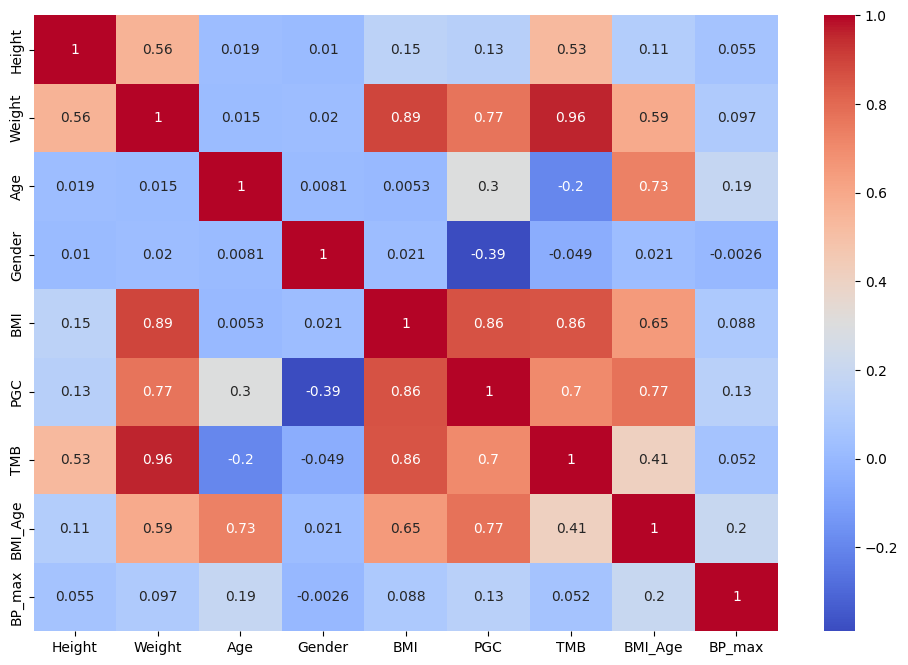

In [156]:
columns = ['Height', 'Weight', 'Age', 'Gender', 'BMI', 'PGC', 'TMB', 'BMI_Age', 'BP_max']
df_useful = df_new[columns]

plt.figure(figsize=(12,8))
sns.heatmap(df_useful.corr(),cmap='coolwarm',annot=True)

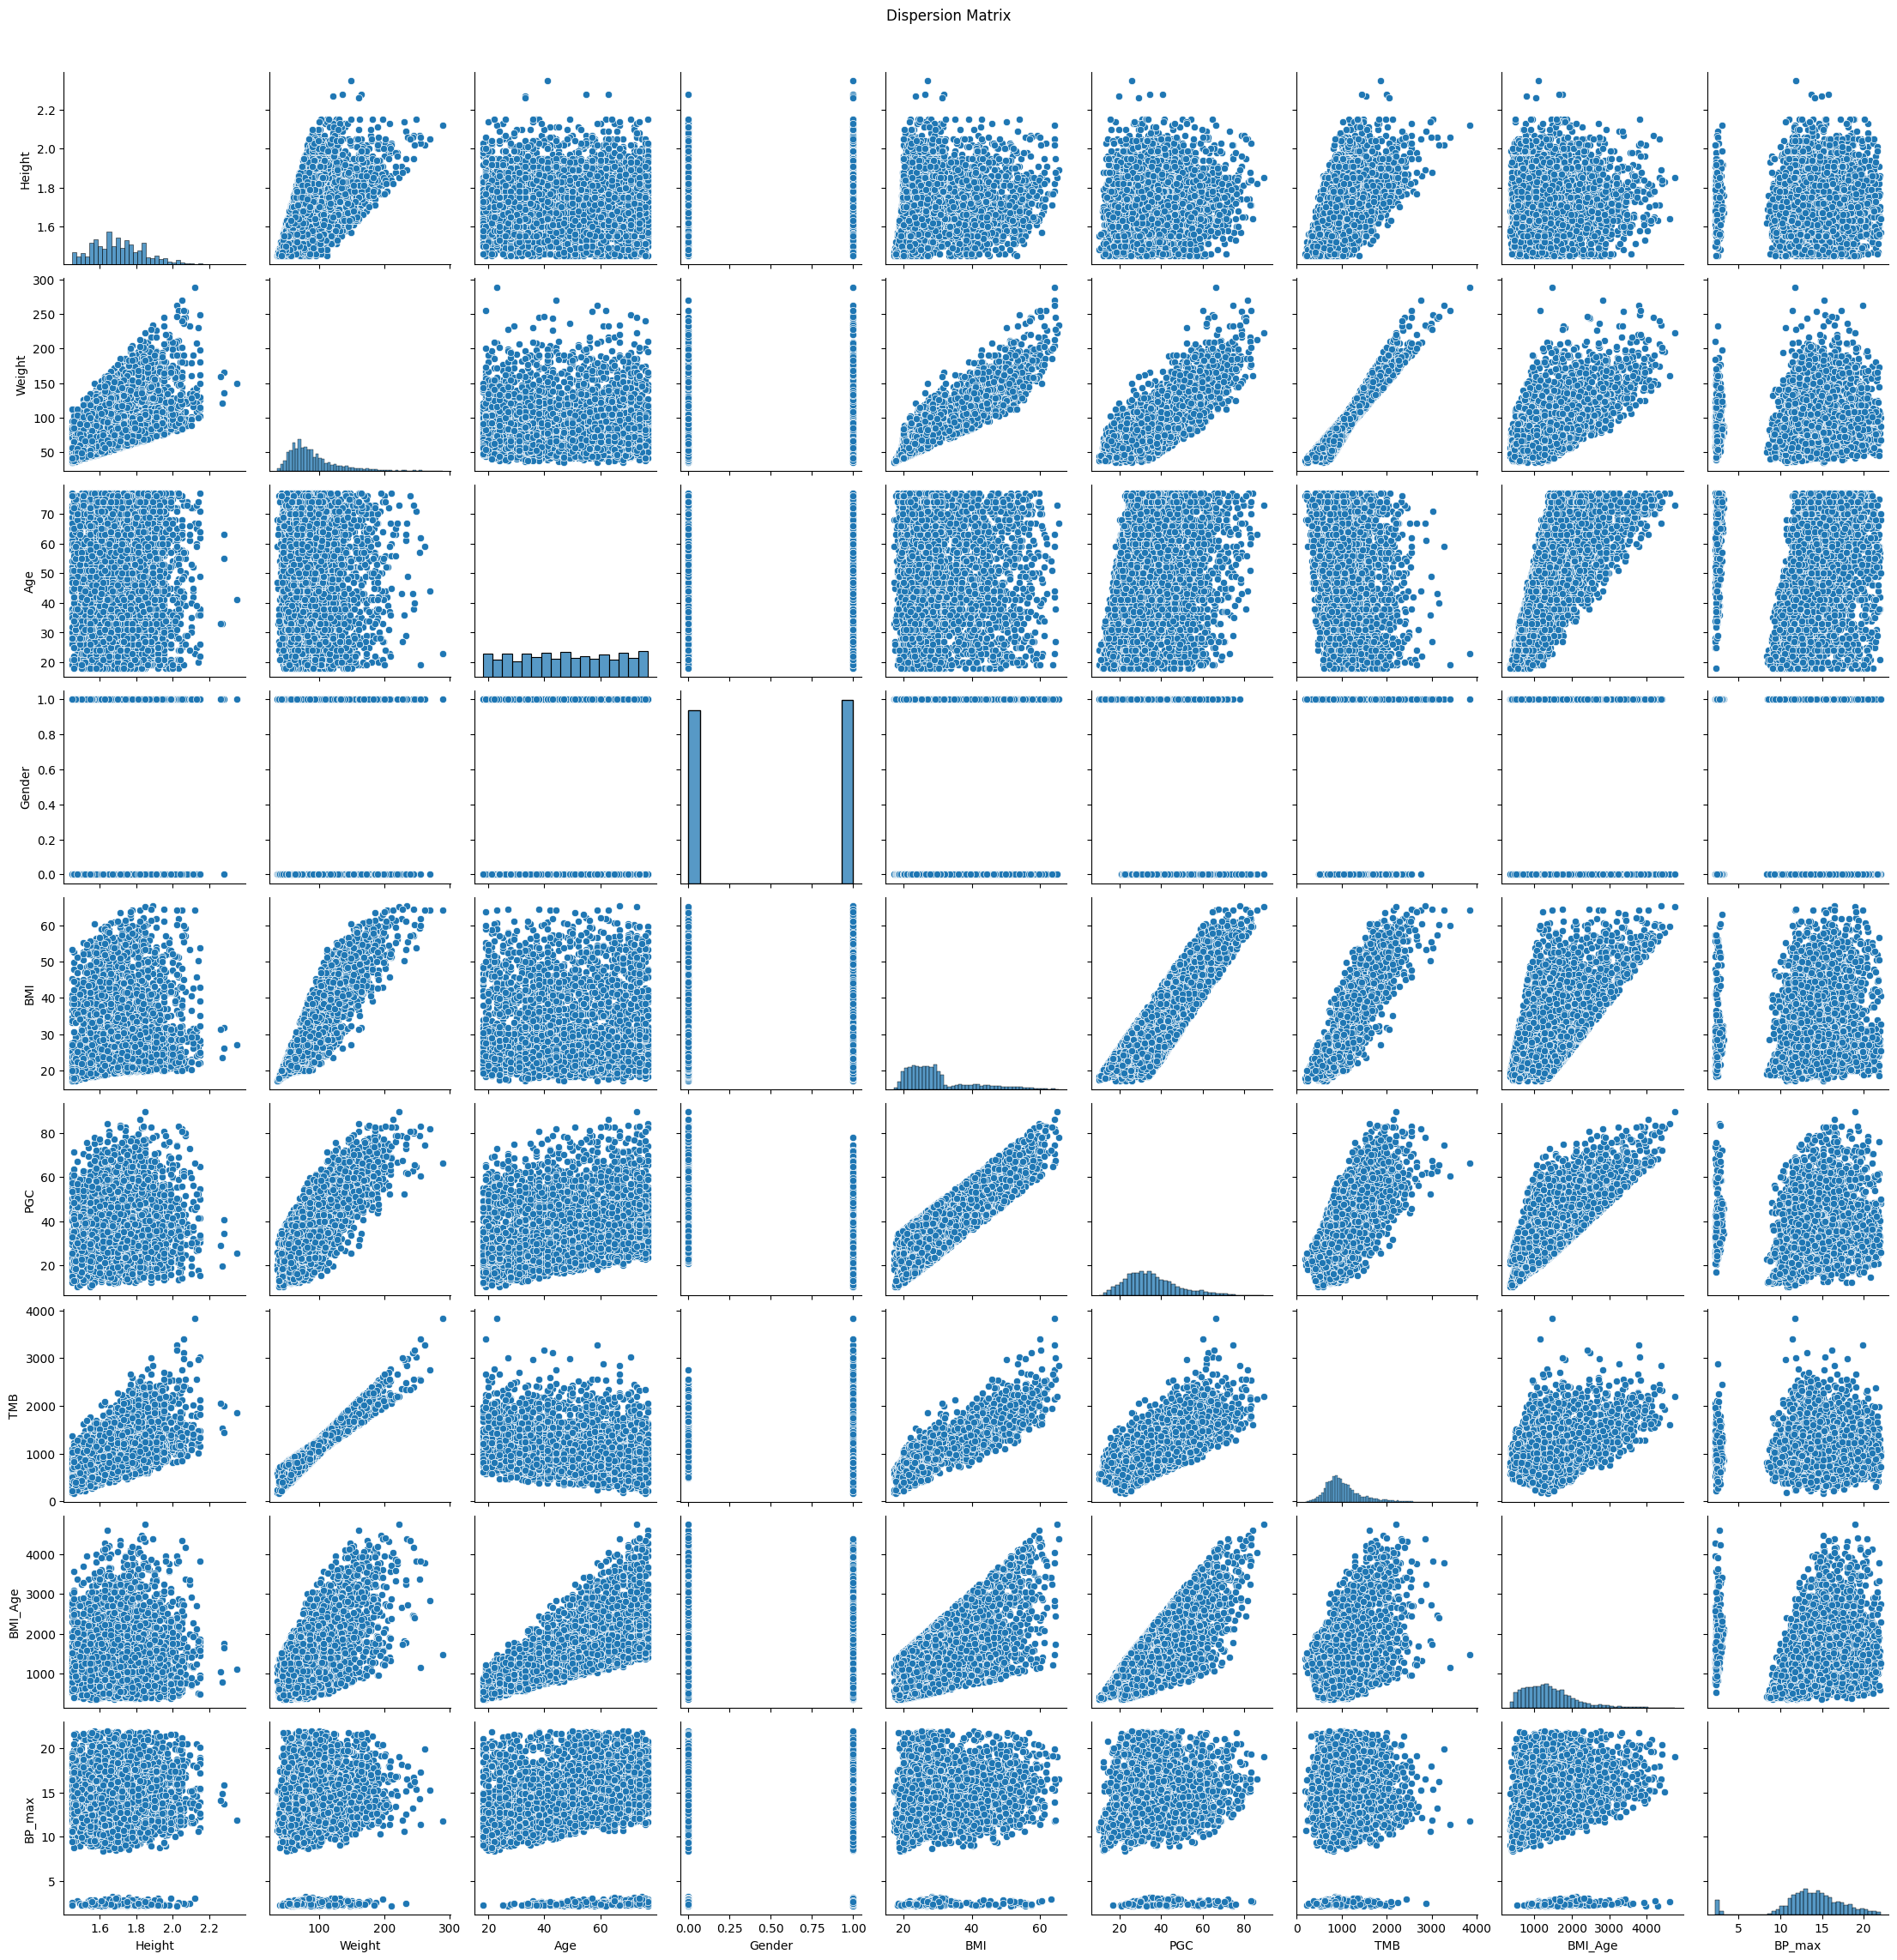

In [157]:
numerical_columns = ['Height', 'Weight', 'Age', 'Gender', 'BMI', 'PGC', 'TMB', 'BMI_Age', 'BP_max']

# Use Seaborn's pairplot to create a scatter matrix
sns.pairplot(df_useful[numerical_columns])
plt.suptitle('Dispersion Matrix', y=1.02)
plt.show()

# Regresion Lineal

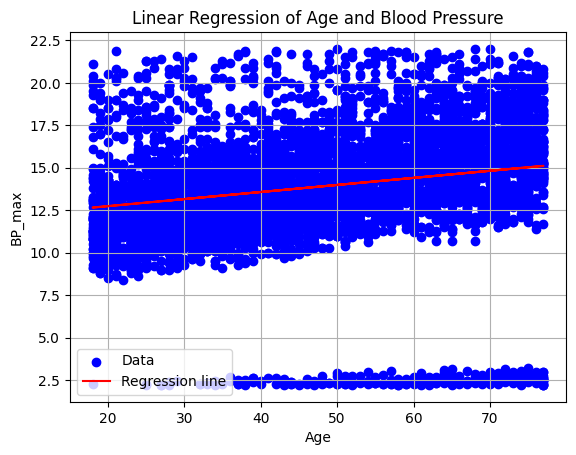

Slope (m): 0.04162939109475527
Intersection (b): 11.907189062423411


In [158]:
# Perform Linear Regression of each column with respect to BP_max
x = df_useful['Age']  # Variable feature
y = df_useful['BP_max']   # Variable target

# Calculate the linear regression
n = len(x)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
b = (np.sum(y) - m * np.sum(x)) / n

# Generate predicted values
y_pred = m * x + b

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('BP_max')
plt.title('Linear Regression of Age and Blood Pressure')
plt.legend()
plt.grid()
plt.show()

# Display the slope and intercept
print(f'Slope (m): {m}')
print(f'Intersection (b): {b}')

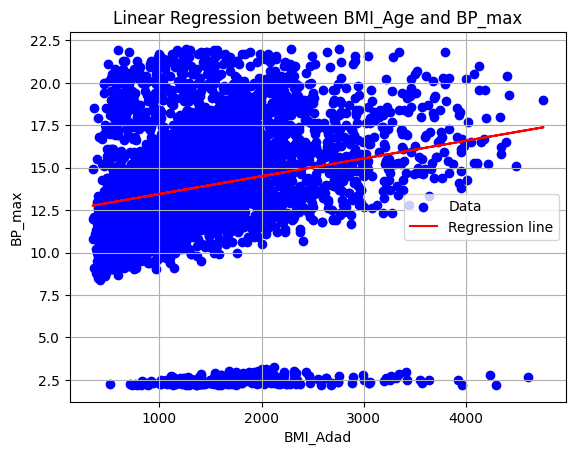

Slope (m): 0.0010463162471734465
Intersection (b): 12.400926770506244


In [159]:
# Perform Linear Regression of each column with respect to BP_max
x = df_useful['BMI_Age']  # Variable independiente
y = df_useful['BP_max']   # Variable dependiente

# Calculate the linear regression
n = len(x)
m = (n * np.sum(x * y) - np.sum(x) * np.sum(y)) / (n * np.sum(x**2) - (np.sum(x))**2)
b = (np.sum(y) - m * np.sum(x)) / n

# Generate predicted values
y_pred = m * x + b

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('BMI_Age')
plt.ylabel('BP_max')
plt.title('Linear Regression between BMI_Age and BP_max')
plt.legend()
plt.grid()
plt.show()

# Display the slope and intercept
print(f'Slope (m): {m}')
print(f'Intersection (b): {b}')

   BP_max Age_range
1   13.30     28-32
2    2.49       NaN
3   18.30     48-52
4    2.58       NaN
5    9.80     18-22


<ipython-input-160-389baa06d98d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['Age_range'] = pd.cut(df_useful['Age'], bins=bins, labels=labels, right=False)
<ipython-input-160-389baa06d98d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['BP_max'] = pd.to_numeric(df['BP_max'], errors='coerce')
<ipython-input-160-389baa06d98d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curren

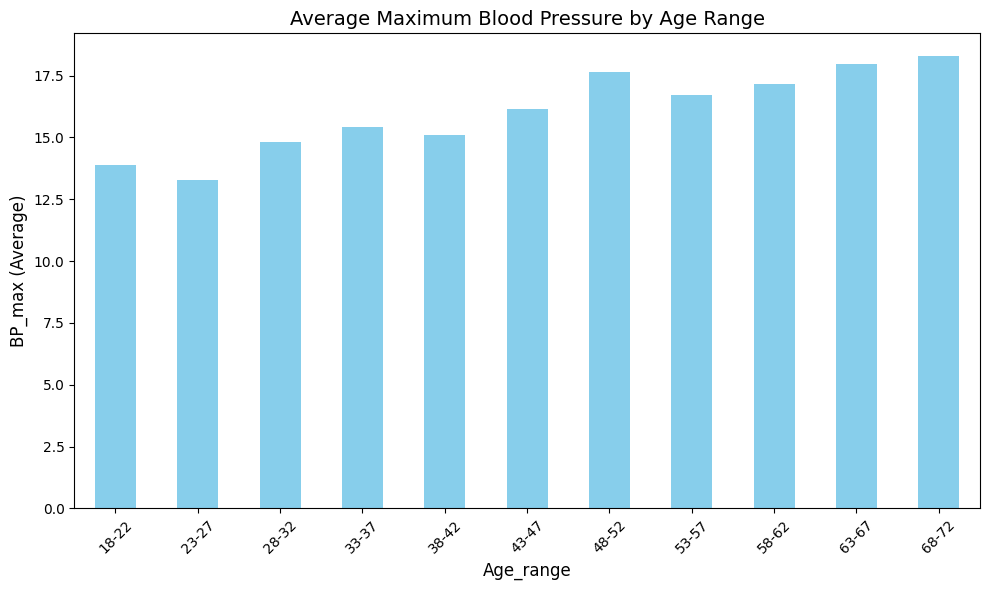

In [160]:
# Blood Pressure Chart by Age Range
# Create 5-year age ranges (e.g., 0-4, 5-9, etc.)
bins = range(18, 78, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Add the 'Age_Range' column using the pd.cut() function
df_useful['Age_range'] = pd.cut(df_useful['Age'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with the new column
print(df_useful[['BP_max', 'Age_range']].head())

# Count the number of people in each age range
age_range_counts = df_useful['Age_range'].value_counts().sort_index()

df_useful['BP_max'] = pd.to_numeric(df['BP_max'], errors='coerce')
bp_max_average = df_useful.groupby('Age_range')['BP_max'].mean()

# Create a bar chart with the average BP_max
plt.figure(figsize=(10,6))
bp_max_average.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Maximum Blood Pressure by Age Range', fontsize=14)
plt.xlabel('Age_range', fontsize=12)
plt.ylabel('BP_max (Average)', fontsize=12)

# Show the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Final Report

Final Conclusion: Dear Managers, After conducting a detailed analysis of the data corresponding to various factors that explain Blood Pressure among the dataset's individuals, we can confirm that the variable that best explains and influences Blood Pressure is age. As age progresses, blood pressure also increases. Therefore, it is important to maintain a youthful body by adopting a healthier lifestyle that may include healthy diets, physical exercise, fasting, etc.

The average maximum blood pressure (BP_max) tends to increase with age, peaking in the 60-64 age group, where it exceeds 20 mmHg. From this group onward, BP_max slightly decreases but remains high in individuals aged 65-79, reflecting a prevalence of hypertension in older ages. Younger groups (15-39 years) show lower BP_max values, indicating better cardiovascular health.

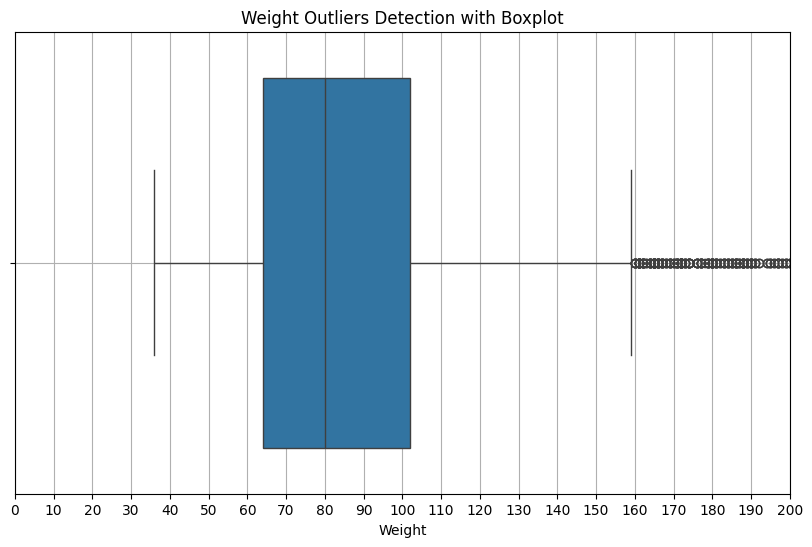

In [161]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_useful['Weight'])

# Show the chart
plt.title('Weight Outliers Detection with Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

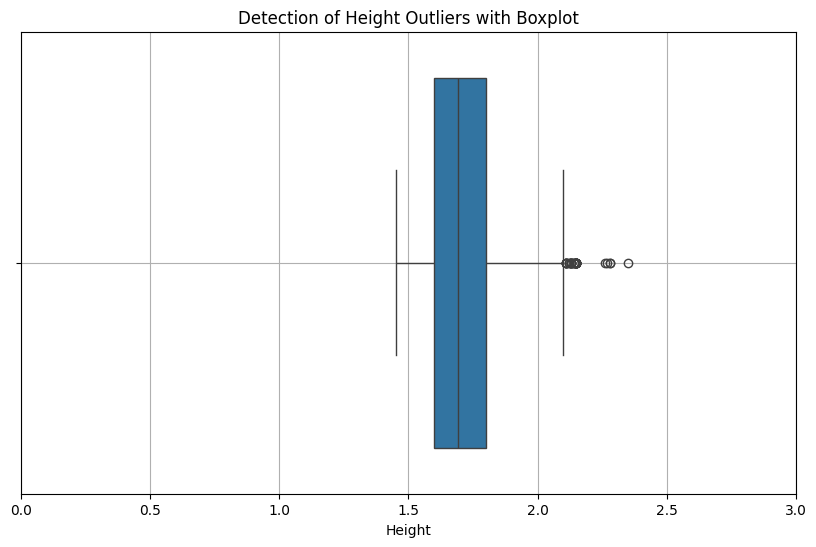

In [162]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_useful['Height'])

# Show the chart
plt.title('Detection of Height Outliers with Boxplot')
plt.xlim(0, 3)
plt.grid(True)
plt.show()

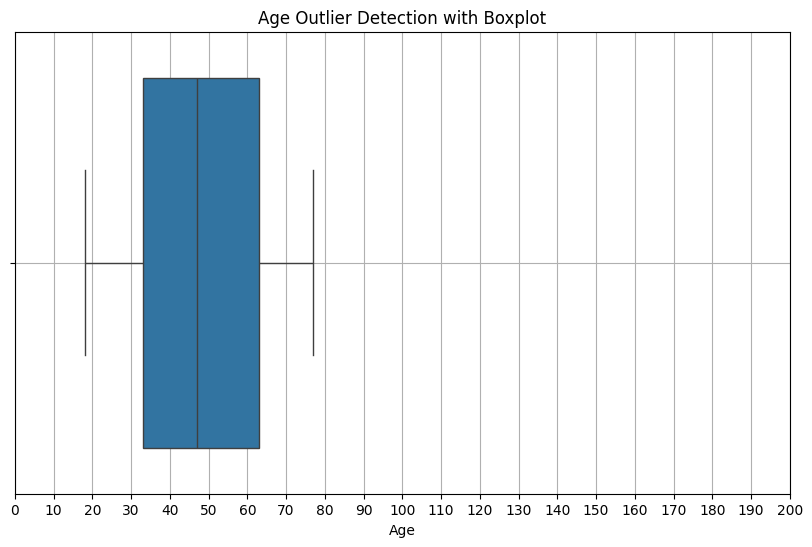

In [163]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_useful['Age'])

# Show the chart
plt.title('Age Outlier Detection with Boxplot')
plt.xlim(0, 200)
plt.xticks(range(0, 201, 10))
plt.grid(True)
plt.show()

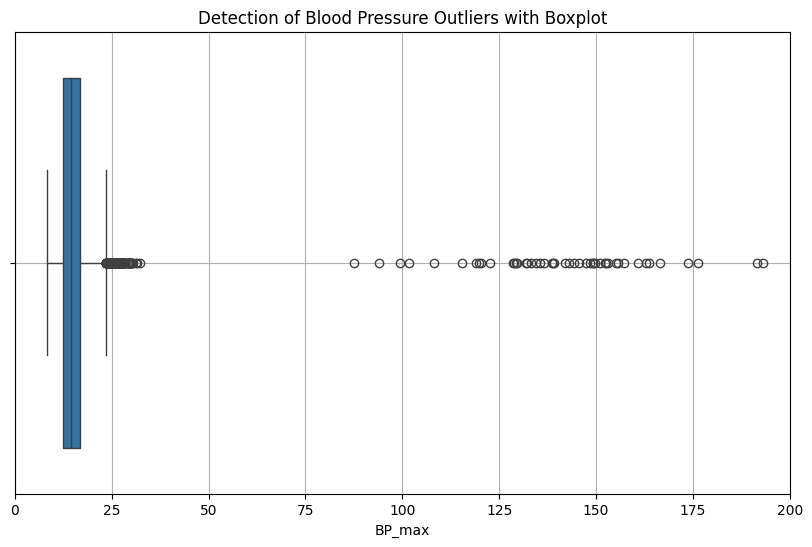

In [164]:
# Create a boxplot for the column of interest
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_useful['BP_max'])

# Show the chart
plt.title('Detection of Blood Pressure Outliers with Boxplot')
plt.xlim(0, 200)
plt.grid(True)
plt.show()